## Solving ODEs with Physics-Informed Neural Networks (PINNs)
[Tutorial](https://docs.sciml.ai/NeuralPDE/dev/tutorials/ode/)

The `ODEProblem` defines a problem $u' = f(u, p, t)$ with an initial condition $u(t_0) = u_0$. With PINNs, we choose a neural network architecture `NN` to represent the solution `u` and seek parameters `p` such that $NN' = f(NN, p, t)$ for all points in the domain.

In [8]:
using Pkg
Pkg.activate("../../PINN")

using NeuralPDE, Flux, OptimizationOptimisers, Plots

  Activating project at `~/SURE2023/scientific_julia/jen`


We will be solving the ODE $u' = cos(2\pi t)$ with $u_0 = 0$.

In [9]:
linear(u, p, t) = cos(2pi * t)
tspan = (0.0f0, 10.0f0)
u0 = 0.0f0
prob = ODEProblem(linear, u0, tspan)

ODEProblem with uType Float32 and tType Float32. In-place: false
timespan: (0.0f0, 10.0f0)
u0: 0.0f0

To define the `NNODE` solver, we must choose a neural network architecture. We will use the `Flux.jl` library to define a multilayer perceptron (MLP) with one hidden layer of 5 nodes and a sigmoid activation function.

In [10]:
chain = Flux.Chain(Dense(1, 5, σ), Dense(5, 1))     # Chain connects layers
                                                    # Here we are connecting two Dense layers
                                                    # A dense layer is a fully connected layer
                                                    # Dense(input, output, activation_function)

Chain(
  Dense(1 => 5, σ),                     # 10 parameters
  Dense(5 => 1),                        # 6 parameters
)                   # Total: 4 arrays, 16 parameters, 320 bytes.

Now we must choose an optimizer to define the `NNODE` solver. A common choice is `ADAM`, with a tunable rate, which we will set to 0.1.
- Optimisers are algorithms or methods used to change the attributes of your NN (weights, learning rate) in order to reduce the losses
- How you change your weights or learning rates of your NN to reduce the losses is defined by the optimizers you use

In [11]:
opt = OptimizationOptimisers.Adam(0.1)
alg = NeuralPDE.NNODE(chain, opt)       # Connects the architecture and optimizer

NNODE{Chain{Tuple{Dense{typeof(σ), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}}}, Optimisers.Adam{Float64}, Nothing, Nothing, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, Nothing}(Chain(Dense(1 => 5, σ), Dense(5 => 1)), Optimisers.Adam{Float64}(0.1, (0.8999999761581421, 0.9990000128746033), 2.220446049250313e-16), nothing, false, nothing, nothing, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())

Once these pieces are together, we call `solve` just like with any other `ODEProblem` solver.

In [12]:
sol = solve(prob, alg, verbose = false, abstol = 1.0f-6, maxiters = 200)

retcode: Success
Interpolation: Trained neural network interpolation
t: 0.0f0:0.1010101f0:10.0f0
u: 100-element Vector{Float32}:
 0.0
 0.12585978
 0.218657
 0.244937
 0.2020764
 0.13885313
 0.09572784
 0.07715939
 0.074022956
 0.07840388
 ⋮
 0.11438579
 0.115369014
 0.11636531
 0.11737419
 0.118394785
 0.119426616
 0.120469004
 0.121521264
 0.12258306

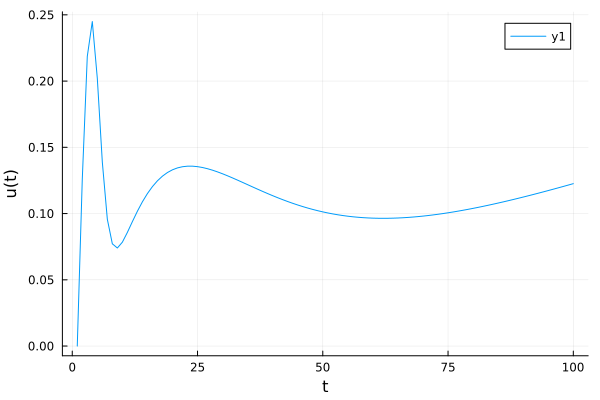

In [13]:
plot(sol.u, xlabel = "t", ylabel = "u(t)")